# End to End multi-class Dog breed classification
### the data set being used is:
https://www.kaggle.com/competitions/dog-breed-identification/data

In [1]:
# unzip the data set
# !unzip "drive/MyDrive/dog-breed-images/archive.zip" -d "drive/MyDrive/dog_vision"

# Get the workspace ready

In [2]:
# !pip uninstall -y tensorflow keras tensorflow-hub numpy
# !pip install numpy==1.26.4 tensorflow==2.15.0 keras==2.15.0 tensorflow-hub==0.15.0

In [3]:
# --import tensorflow into colab--
import tensorflow as tf
import tensorflow_hub as hub

In [4]:
print("tensorflow version:", tf.__version__)
print("tensorflow hub version:", hub.__version__)
print("gpu is", "avalible" if tf.config.list_physical_devices("GPU") else "not avalible")

tensorflow version: 2.15.0
tensorflow hub version: 0.15.0
gpu is not avalible


## Getting the data ready (turning into tensor)

In [5]:
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/dog_vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

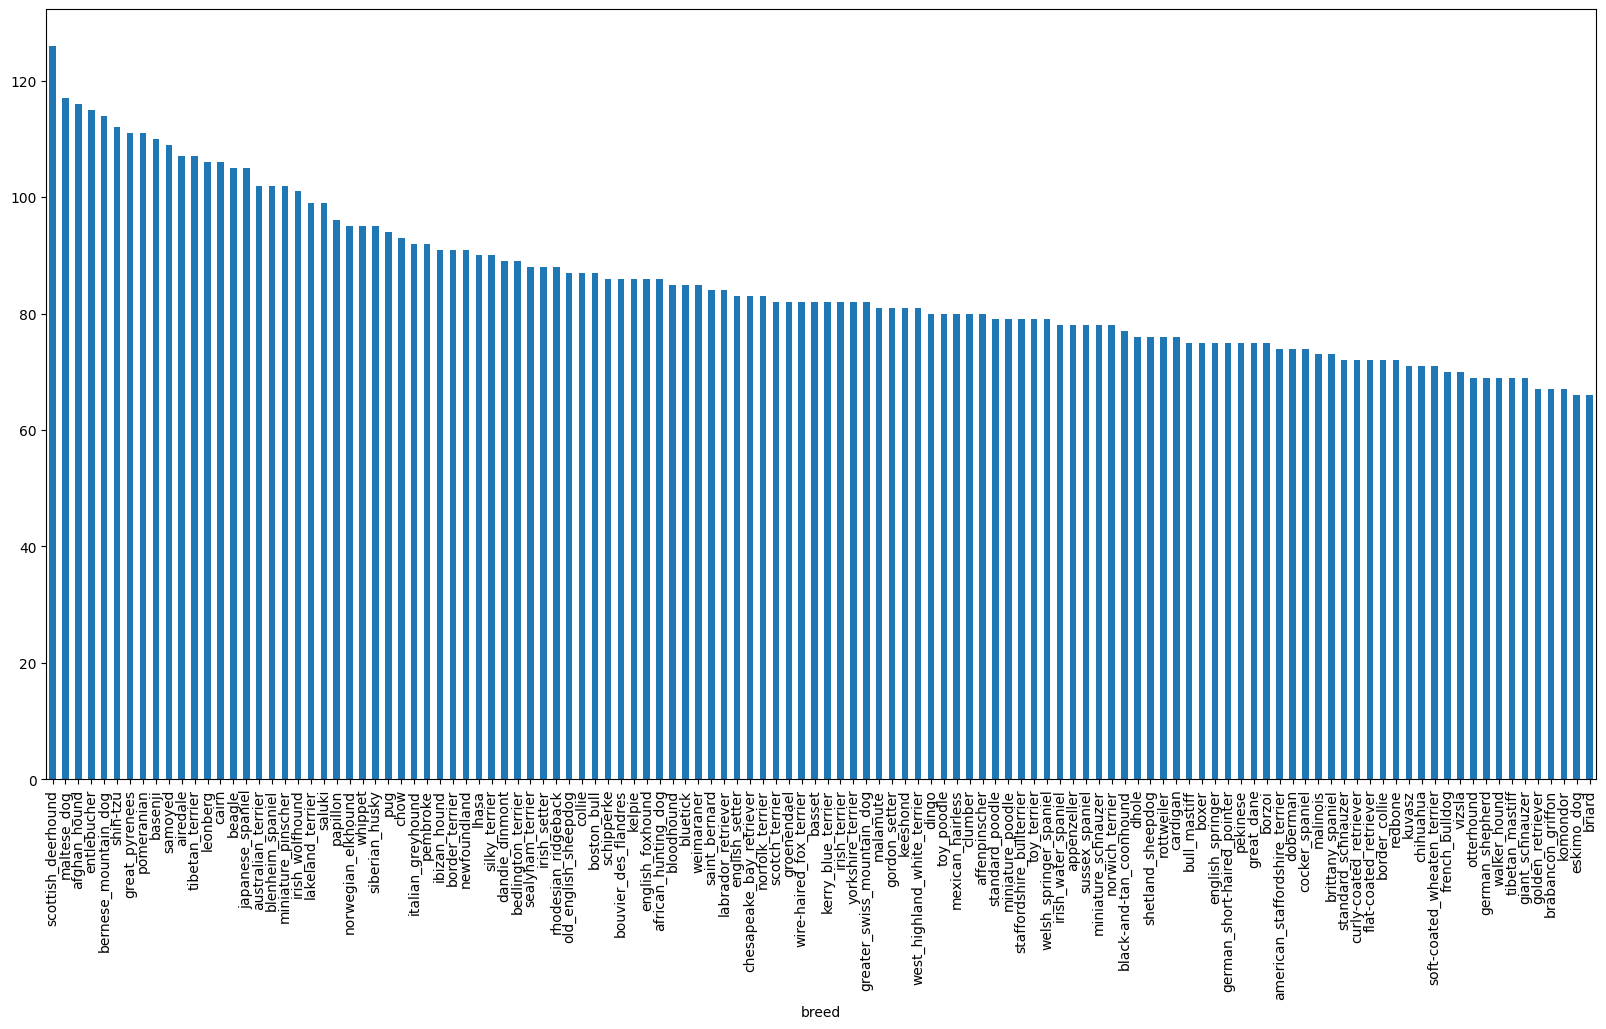

In [6]:
# How many images are there of each breed?
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [7]:
labels_csv['breed'].value_counts().median()

82.0

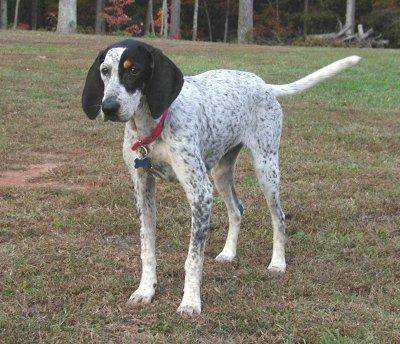

In [8]:
from IPython.display import Image
Image('drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

### Getting images and their labels

In [9]:
filenames = [f"drive/MyDrive/dog_vision/train/{fname}.jpg" for fname in labels_csv["id"]]
len(filenames)

10222

In [10]:
# check whether number of filenames matches number of actual image files
import os
if len(os.listdir('drive/MyDrive/dog_vision/train/')) == len(filenames):
  print('your data is match with data source ✅')
else:
  print('your data is not match with data source check out and find the problem ❌')

your data is match with data source ✅


In [11]:
os.listdir('drive/MyDrive/dog_vision')

['labels.csv',
 'sample_submission.csv',
 'test',
 'train',
 'logs',
 '.ipynb_checkpoints']

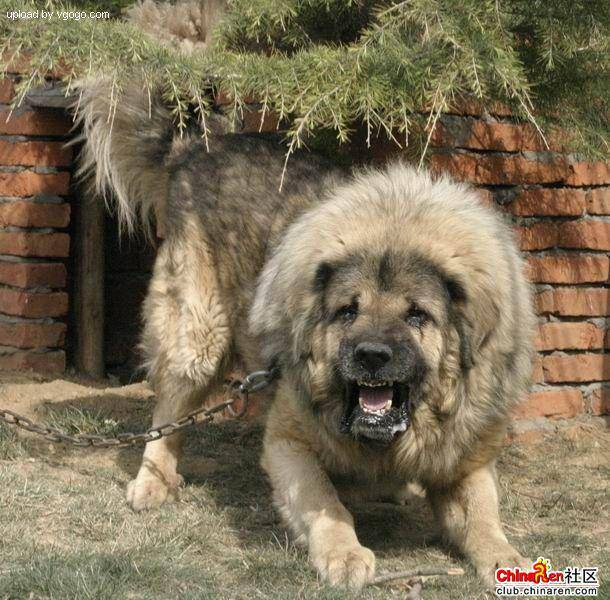

In [12]:
Image(filenames[9000])

In [13]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [14]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [15]:
import numpy as np

labels = labels_csv['breed'].to_numpy()
# labels = np.array(labels)
print(labels)
print(len(labels))

['boston_bull' 'dingo' 'pekinese' ... 'airedale' 'miniature_pinscher'
 'chesapeake_bay_retriever']
10222


In [16]:
# Ensure that the number of labels matches the number of files.

if len(labels) == len (filenames):
  print('The data is matched right now. proceed')
else:
  print('The data does not matche the labels. do not go further.')

The data is matched right now. proceed


In [17]:
# Find the unique label values.
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [18]:
# Turn a single label into an array of booleans.
print(labels[2])
labels[2] == unique_breeds

pekinese


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [19]:
# Turn every label into an array of booleans
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [20]:
print(len(boolean_labels))

10222


In [21]:
# Example: Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [22]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [23]:
filenames[:3]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

### Creating our own validation set

In [24]:
# Setup X & Y variables
x = filenames
y = boolean_labels

In [25]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [26]:
# Split the data into train and validation of total size NUM_IMAGES
np.random.seed(42)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

In [27]:
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [28]:
x_train[:3], y_train[:1]

(['drive/MyDrive/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/dog_vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

## Preprocessing images (turning images into tensors)

array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  66,  73],
        [ 78,  71,  78],
        [ 73,  66,  73]],

       [[ 82,  72,  80],
        [ 90,  80,  88],
        [ 84,  74,  82],
        ...,
        [ 73,  64,  69],
        [ 76,  67,  72],
        [ 72,  63,  68]],

       ...,

       [[ 27,  27,  19],
        [ 21,  21,  13],
        [ 17,  17,   9],
        ...,
        [ 39,  51,  49],
        [ 48,  60,  58],
        [ 45,  57,  55]],

       [[ 24,  21,  14],
        [ 10,   7,   0],
        [  6,   3,   0],
        ...,
        [ 25,  37,  35],
        [ 38,  50,  48],
        [ 33,  45,  43]],

       [[ 18,  15,   8],
        [ 18,  15,   8],
        [ 22,  19,  12],
        ...,
        [ 30,  42,  40],
        [ 54,  66,  64],
        [ 57,  69,  67]]], dtype=uint8)
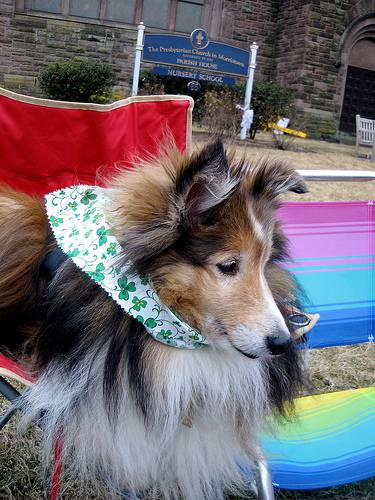

In [29]:
# Before lets convert image into Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[10])
image

In [30]:
# Find the maximum and minimum value in the image
image.max(), image.min()

(255, 0)

In [31]:
# Turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  66,  73],
        [ 78,  71,  78],
        [ 73,  66,  73]]], dtype=uint8)>

In [32]:
# Turn image into a tensor
red_image = tf.constant(image)[:,:,1]
red_image

<tf.Tensor: shape=(500, 375), dtype=uint8, numpy=
array([[100, 110, 102, ...,  68,  73,  67],
       [ 89, 102,  99, ...,  66,  71,  66],
       [ 72,  80,  74, ...,  64,  67,  63],
       ...,
       [ 27,  21,  17, ...,  51,  60,  57],
       [ 21,   7,   3, ...,  37,  50,  45],
       [ 15,  15,  19, ...,  42,  66,  69]], dtype=uint8)>

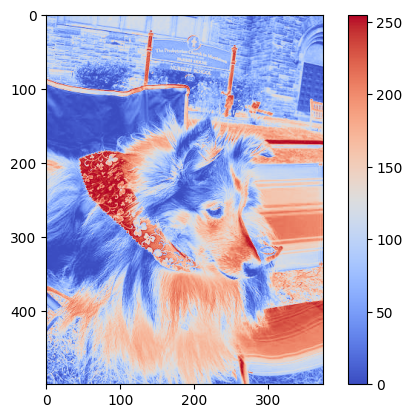

In [33]:
# Display a image with one color (green) channel.
import matplotlib.pyplot as plt
plImg = plt.imshow(red_image.numpy(), cmap="coolwarm")
plt.colorbar(plImg)
plt.show()

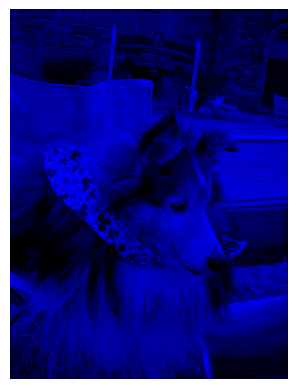

In [34]:
# Displaying image with three color channel but one of them have value (blue)
red_channel = np.zeros_like(image)
red_channel[:, :, 2] = image[:, :, 0]
plt.imshow(red_channel)
plt.axis('off')
plt.show()

In [35]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path):
  """
  Take an image file path and turn the image into a Tensor.
  """
  # Read in an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

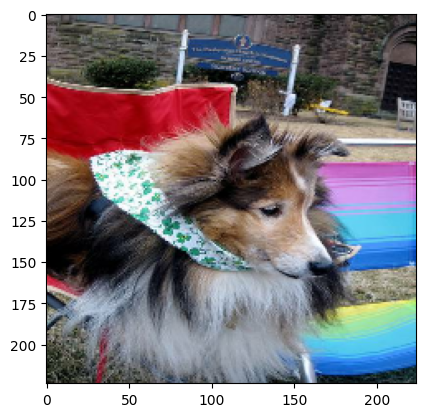

In [36]:
red_image = process_image(filenames[10])
plImg = plt.imshow(red_image.numpy())
plt.show()

## Turning our data into batches

In [37]:
# creating a function to return a tuple that is include of (image, label)
def get_image_label(image_path, label):
  """
  Take an image file path name and the associated label,
  process the image and return a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [38]:
get_image_label(x[34],tf.constant(y[34]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.09042301, 0.10218772, 0.12179556],
         [0.11473363, 0.12649834, 0.14610618],
         [0.09272581, 0.10449051, 0.12409835],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.80392164, 0.77647066, 0.7137255 ]],
 
        [[0.08168885, 0.09737512, 0.10913983],
         [0.09317887, 0.10886515, 0.12062985],
         [0.1127224 , 0.12840867, 0.14017338],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.80480576, 0.7773548 , 0.7146096 ]],
 
        [[0.1778584 , 0.19354467, 0.20530938],
         [0.10785257, 0.12353884, 0.13530354],
         [0.17694902, 0.1926353 , 0.2044    ],
         ...,
         [0.8196079 , 0.79215693, 0.7294118 ],
         [0.8136382 , 0.78618723, 0.7234421 ],
         [0.8078432 , 0.7803922 , 0.7176471 ]],
 
        ...,
 
        [[0.14830667, 0.16399294

## Create a function to turn our data into batches

In [39]:
# Define the batch size, 32 is a good start.
BATCH_SIZE = 32

# Create a function to turn data into batches.
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image(x) and labels(y) pairs.
  """
  # If data is a test dataset, we probably don't have labels.
  if test_data:
    print('creating data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepathes(no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepath
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)
                                              ,tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images.
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [40]:
# Creating training and validation data batches
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating data batches...
Creating validation data batches...


In [41]:
# Check out different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

In [42]:
import matplotlib.pyplot as plt

# Create a function to viewing images in a data batch
def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from a data batch.
  """
  # setup the fugure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image labels as title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid line off
    plt.axis("off")

In [43]:
train_images, train_labels = next(train_data.as_numpy_iterator())
# train_images, train_labels

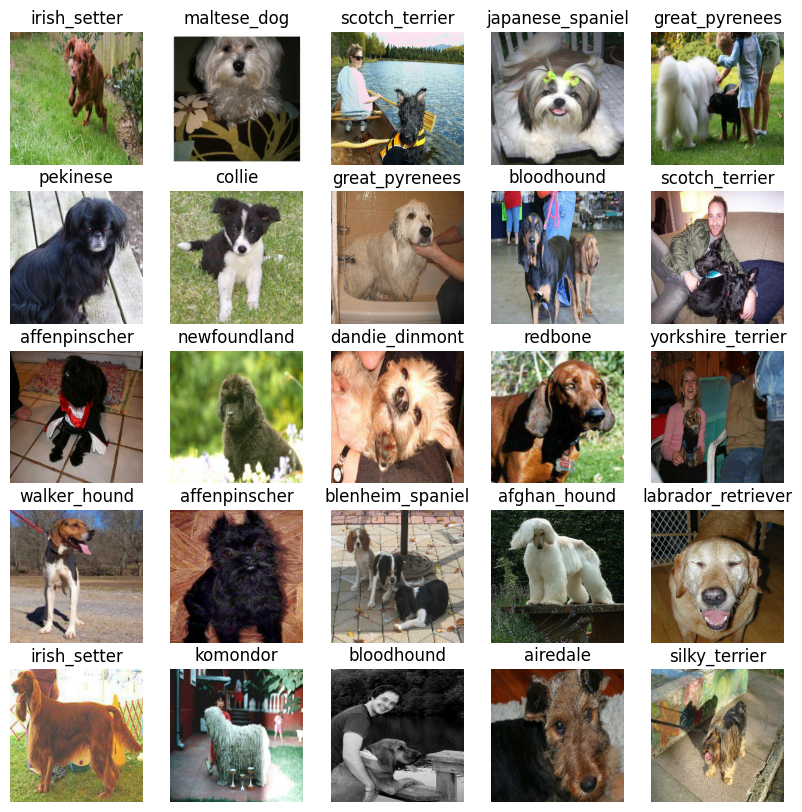

In [44]:
# Visualizing data in a training batch
show_25_images(train_images, train_labels)

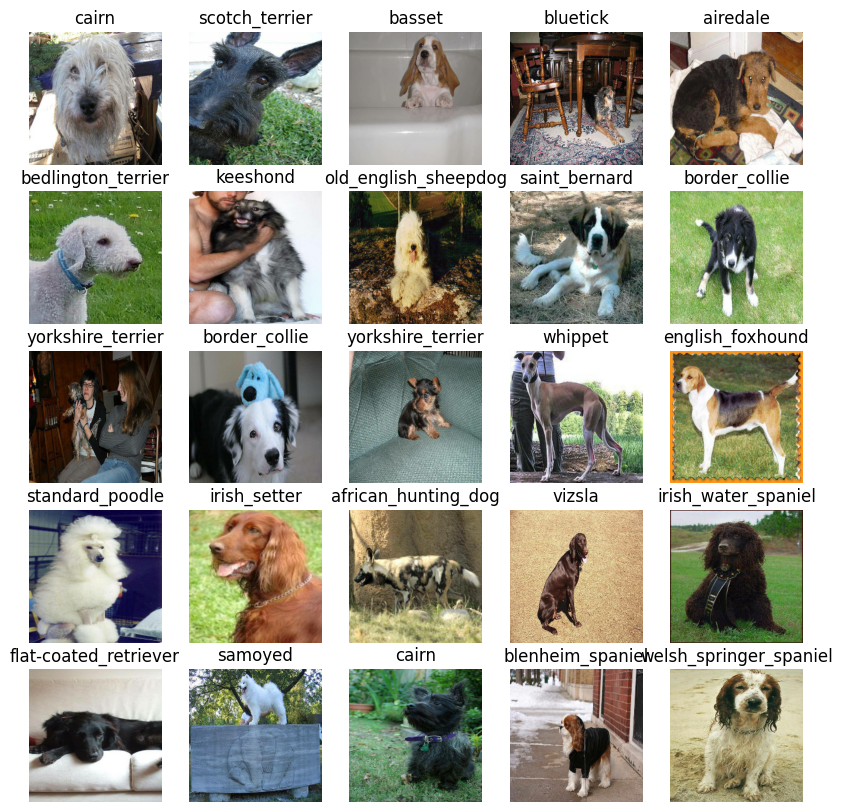

In [45]:
# Now visualize our validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model


In [46]:
# Setup input shape to the model
INPUT_SHAPE = [None ,IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from tensorflow Hub
# MODEL_URL = "https://kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/1"
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4"

In [47]:
# Create a function which is builds a keras model.
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print(f"Building model with {MODEL_URL}")

  # setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax"), # Layer 2 (output layer)
  ])

  # Compile the mode
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [48]:
model = create_model()
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1664)              3766048   
                                                                 
 dense (Dense)               (None, 120)               199800    
                                                                 
Total params: 3965848 (15.13 MB)
Trainable params: 199800 (780.47 KB)
Non-trainable params: 3766048 (14.37 MB)
_________________________________________________________________


## Create callbacks


### TensorBoard Callback

In [49]:
# Load tensorBoard notebook extenstion
%load_ext tensorboard

In [50]:
import datetime

# Create a funtion to build a TensorBoard callback
def creat_tensorboard_callback():
  # Creating a log directory for storing TensorBoard log
  logdir = os.path.join("drive/MyDrive/dog_vision/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S '))
  return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

In [51]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

In [52]:
## Training a model (on subset of data)
NUM_EPOCHS = 10 #@param {type:"slider", min:10, max:100, step:10}

In [53]:
# Check to see are we on GPU or CPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not evailable :<")

GPU not evailable :<


In [54]:
# Build a function to train and return a trainded model
def train_model():
  """
  Train a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we trained a model
  tensorboard = creat_tensorboard_callback()

  # Fit the model to the data
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model


In [79]:
# Fit the model to the data
# model = train_model()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4
Epoch 1/10
25/25 [==============================] - 84s 3s/step - loss: 4.2261 - accuracy: 0.1525 - val_loss: 3.1871 - val_accuracy: 0.3600
Epoch 2/10
25/25 [==============================] - 82s 3s/step - loss: 1.3993 - accuracy: 0.8012 - val_loss: 1.8970 - val_accuracy: 0.5600
Epoch 3/10
25/25 [==============================] - 81s 3s/step - loss: 0.5207 - accuracy: 0.9575 - val_loss: 1.4597 - val_accuracy: 0.6400
Epoch 4/10
25/25 [==============================] - 64s 3s/step - loss: 0.2612 - accuracy: 0.9887 - val_loss: 1.3347 - val_accuracy: 0.6500
Epoch 5/10
25/25 [==============================] - 50s 2s/step - loss: 0.1645 - accuracy: 0.9962 - val_loss: 1.2608 - val_accuracy: 0.6650
Epoch 6/10
25/25 [==============================] - 61s 2s/step - loss: 0.1183 - accuracy: 0.9962 - val_loss: 1.2053 - val_accuracy: 0.6900
Epoch 7/10
25/25 [==============================] - 52s 2s/step - lo

### Checking the TensorBoard logs



In [56]:
# %tensorboard --logdir drive/MyDrive/dog_vision/logs

## Making and evaluating predictions using a trained model

In [80]:
# Make a predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 11s 1s/step


In [81]:
# First prediction
index = 42
# print(predictions[index])
print(f"Max value: {np.max(predictions[index])}")
print(f"SUM: {np.sum(predictions[index])}")
print(f"max label: {np.argmax(predictions[index])}")
print(f"prediction labels: {unique_breeds[np.argmax(predictions[index])]}")

Max value: 0.5533517003059387
SUM: 0.9999999403953552
max label: 113
prediction labels: walker_hound


In [82]:
# Trun prediction probabilities into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turn an arrya of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a prediction label based on an array of prediction probabilities
get_pred_label(predictions[0])

'cairn'

In [83]:
# Create a funtion to unbatch the batch dataset.
def unbatchify(batch_file):
  """
  Get a batched dataset of (image, label) and unbatch it to seperate array of first images and then labels
  """
  images = []
  labels = []

  for image, label in batch_file.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels


val_images, val_labels = unbatchify(val_data)
print(val_labels[0])

cairn


In [84]:
# Function that display the resualt of the predictions
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  Veiw the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, images = prediction_probabilities[n], labels[n], images[n]

  # Get pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(images)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if (pred_label == true_label):
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label.
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob) * 100,
                                    true_label),
                                    color=color)

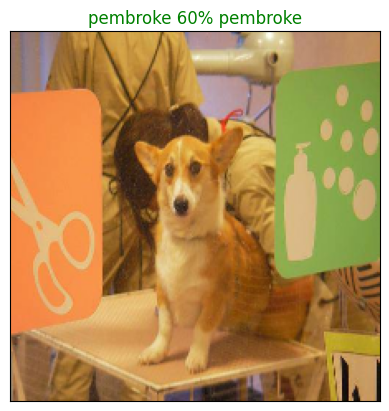

In [85]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=89)

In [86]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plush the top 10 highest prediction confidences along with the truth label for sampl n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence value
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the to 10 prediction labels.
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="gray")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

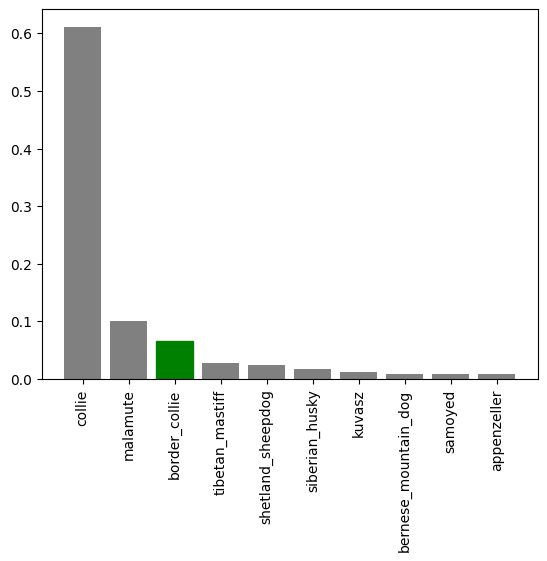

In [87]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

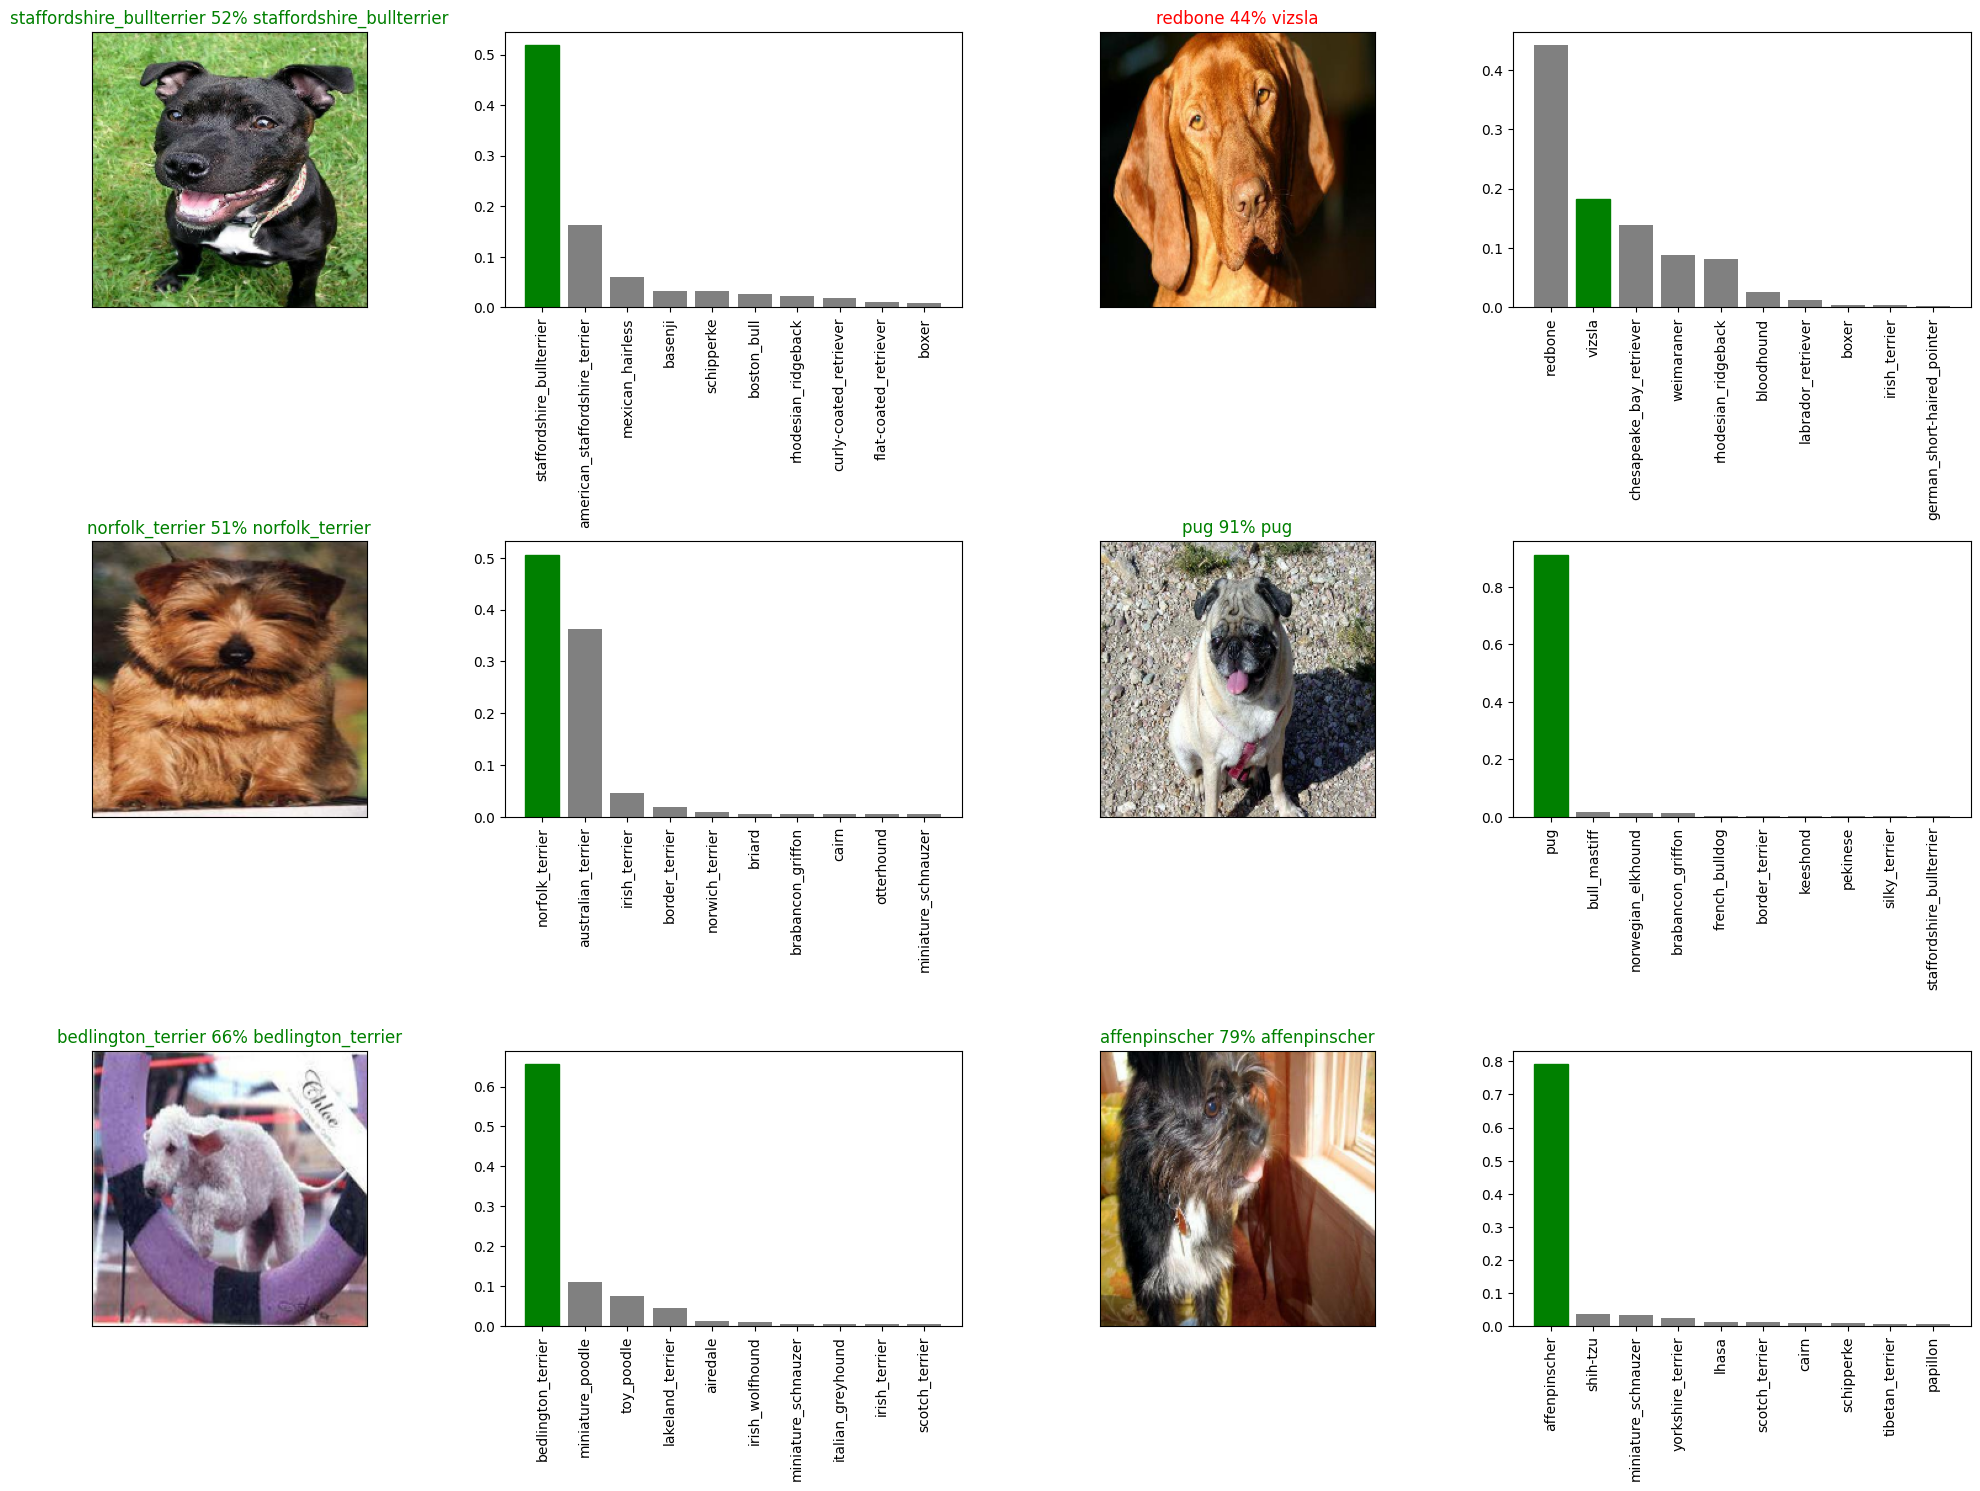

In [90]:
# Let's check out different predicitons and their different values.
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a trained model

In [98]:
# Create a function to save a model
def save_model(mode, suffix=None):
  """
  Seve a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/dog_vision/models/",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # Save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [99]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [100]:
# Saved our model trained of 1000 images.
# save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to: drive/MyDrive/dog_vision/models/20250806-13131754485981-1000-images-mobilenetv2-Adam.h5...


'drive/MyDrive/dog_vision/models/20250806-13131754485981-1000-images-mobilenetv2-Adam.h5'

In [101]:
# Load a trained model
loaded_1000_image_model = load_model("drive/MyDrive/dog_vision/models/20250806-13131754485981-1000-images-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/dog_vision/models/20250806-13131754485981-1000-images-mobilenetv2-Adam.h5


In [102]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 11s 2s/step - loss: 1.1294 - accuracy: 0.7150


[1.1294207572937012, 0.7149999737739563]

In [104]:
# Evaluate the loaded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 11s 1s/step - loss: 1.1294 - accuracy: 0.7150


[1.1294207572937012, 0.7149999737739563]